## Load Images of different classes

In [9]:
import os, os.path
import fnmatch
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from skimage import color
%matplotlib inline

In [10]:
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

from matplotlib import rcParams
rcParams['axes.titlepad'] = 4 
rcParams['xtick.labelsize'] = 11
#rcParams.keys()
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

In [11]:
def files_within(directory_path, pattern="*"):
    for dirpath, dirnames, filenames in os.walk(directory_path):
        for file_name in fnmatch.filter(filenames, pattern):
            yield os.path.join(dirpath, file_name)

In [12]:
def LoadImages(path,ImgsType):
    imgs = []
    files = list(files_within(path,"*.jpg"))
    for file in files:
        #print(file)
        if ImgsType not in file: 
            continue
        img = Image.open(file)
        #img = img.resize((1024, 1024))
        img = np.array(img)
        print(file," ",img.shape)
        imgs.append(img)
    #imgs = np.array(imgs)
    #print(len(imgs))
    return imgs

In [13]:
from skimage.feature.texture import greycomatrix

def GetCoMatrix(gray):
    newGray = (gray).astype(int)
    coMatrix = greycomatrix(newGray, [1], [0,np.pi/4,np.pi/2,3*np.pi/4], levels=256, normed=False, symmetric=False)
    return coMatrix

In [14]:
def getFlatten(img,removeblack):
    data = img.flatten()
    if removeblack:
        index = np.argwhere(data==0)
        data = np.delete(data, index)
    return data

In [15]:
def LoadAll(path,ImgsType,removeblack):
    data = []
    imgs = LoadImages(path,ImgsType)
    for im in imgs:
        Gray = color.rgb2gray(im)*255
        #co = GetCoMatrix(Gray)
        #print(co[:,:,0,0])
        x = getFlatten(Gray,removeblack)
        data.append(x)
    return data

In [16]:
types = "No BG"
removeBG = True
data = LoadAll(".",types, removeBG)

.\No BG\100-GOPR1306-frame700.jpg   (733, 1352, 3)
.\No BG\20_GOPR1027-frame150.jpg   (733, 1352, 3)
.\No BG\40-GOPR0978-frame0.jpg   (733, 1352, 3)
.\No BG\60-GOPR1180-frame840.jpg   (733, 1352, 3)
.\No BG\80-GOPR1225-frame700.jpg   (733, 1352, 3)
.\No BG\Clean_GOPR0943.JPG   (995, 1368, 3)


.\No BG\100-GOPR1306-frame700.jpg   (733, 1352, 3)
.\No BG\20_GOPR1027-frame150.jpg   (733, 1352, 3)
.\No BG\40-GOPR0978-frame0.jpg   (733, 1352, 3)
.\No BG\60-GOPR1180-frame840.jpg   (733, 1352, 3)
.\No BG\80-GOPR1225-frame700.jpg   (733, 1352, 3)
.\No BG\Clean_GOPR0943.JPG   (995, 1368, 3)


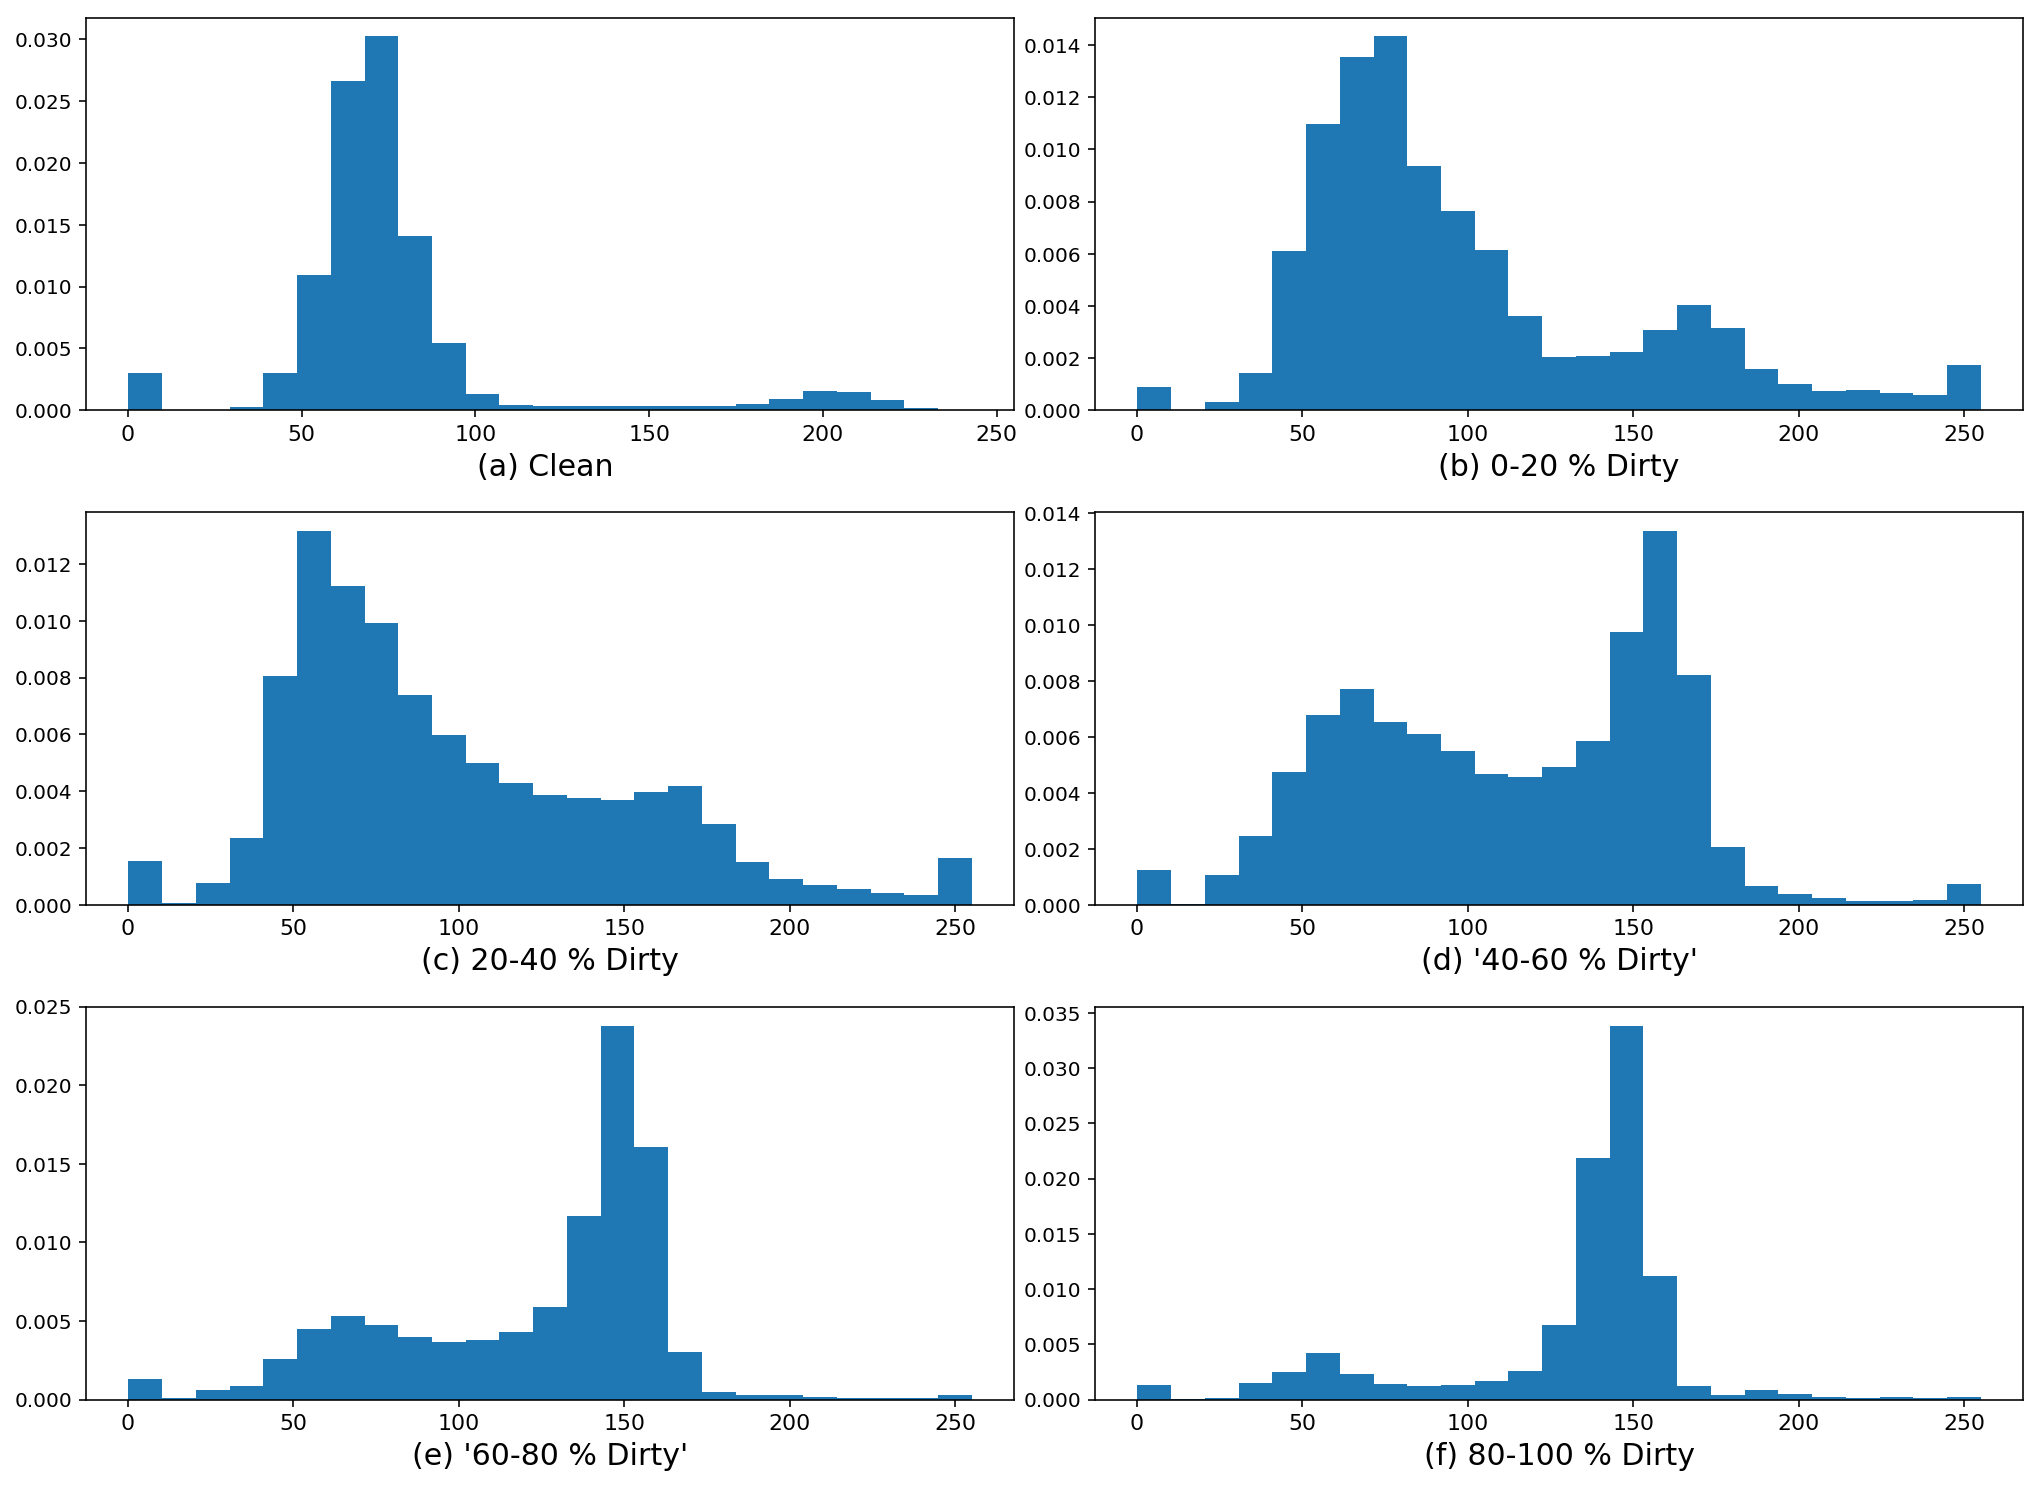

In [17]:
types = "No BG"
removeBG = True
data = LoadAll(".",types, removeBG)
fig, axis = plt.subplots(nrows=3, ncols=2,figsize=(14,10)) 
plt.tight_layout(pad=0.4, w_pad=0.9, h_pad=3)


bins = 25
bplota = axis[0][0].hist(data[5], bins = bins, density=True)
bplotb = axis[0][1].hist(data[1], bins = bins, density=True)
bplotc = axis[1][0].hist(data[2], bins = bins, density=True)
bplotd = axis[1][1].hist(data[3], bins = bins, density=True)
bplote = axis[2][0].hist(data[4], bins = bins, density=True)
bplotf = axis[2][1].hist(data[0], bins = bins, density=True)




fig.texts = [] #flush the old super titles
plt.suptitle('') 



#axis[2][2].set_ylim(0,1)
#will add SLA % and Communicated Size
labels = [["(a) Clean ",'(b) 0-20 % Dirty'],
          ['(c) 20-40 % Dirty',"(d) '40-60 % Dirty'"],
          ["(e) '60-80 % Dirty'",'(f) 80-100 % Dirty']]
for (n_row, n_col), axes in np.ndenumerate(axis):
    axes.set_xlabel(labels[n_row][n_col],fontsize=15)


fig.savefig(types+'.png', dpi=300, bbox_inches='tight', transparent=True)